In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
plt.style.use('cyberpunk')

import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()

#### Models 

In [21]:
fold = StratifiedKFold(n_splits=3)

In [23]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [26]:
score_l = []
score_dt = []
score_svc = []
score_rf = []

for train_index, test_index in fold.split(iris.data, iris.target):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index],\
                                       iris.target[train_index], iris.target[test_index]
    
score_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
score_svc.append(get_score(SVC(), X_train, X_test, y_train, y_test))
score_dt.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
score_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))

In [27]:
score_l

[0.98]

In [28]:
score_svc

[0.94]

In [29]:
score_dt

[0.98]

In [30]:
score_rf

[0.96]

### Model tuning and cross_val_score

In [42]:
lgt = cross_val_score(LogisticRegression(solver='lbfgs', multi_class='ovr'),\
                 iris.data, iris.target, cv=3)

In [43]:
scvt = cross_val_score(SVC(gamma='auto'), iris.data, iris.target, cv=3)

In [45]:
dtt = cross_val_score(DecisionTreeClassifier(criterion='entropy', splitter='best'), iris.data, iris.target)

In [46]:
rft  = cross_val_score(RandomForestClassifier(n_estimators=40), iris.data, iris.target)

In [52]:
model = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier']
score = [lgt.mean(),scvt.mean(), dtt.mean(), rft.mean()]

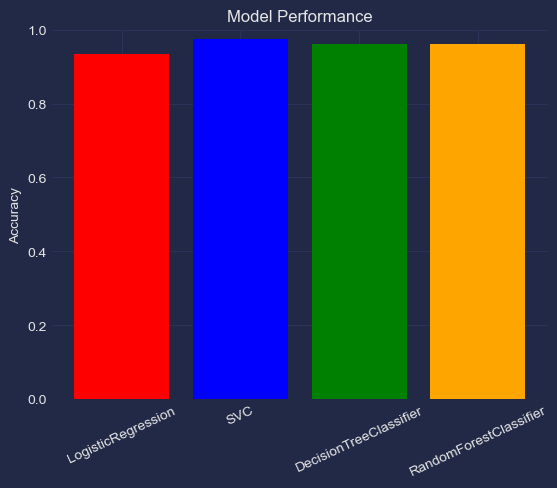

In [57]:
## Visualization

plt.Figure(figsize=(15,5))
plt.bar(model, score, color=['red', 'blue', 'green','orange'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
plt.ylim(0,1)
plt.show()